In [28]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Elizabeth341/Estadistica/refs/heads/main/mental_health.csv")
df = df.rename(columns={
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar_disorders',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive_disorders'
})
df

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive_disorders,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar_disorders,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


Coeficiente de correlación: 0.1530

Coeficiente de determinación:  0.0234

intervalo de confianza para b1 de  95%
 0.5109 < b1 <  0.7026



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6420.
  res = hypotest_fun_out(*samples, **kwds)


valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0128



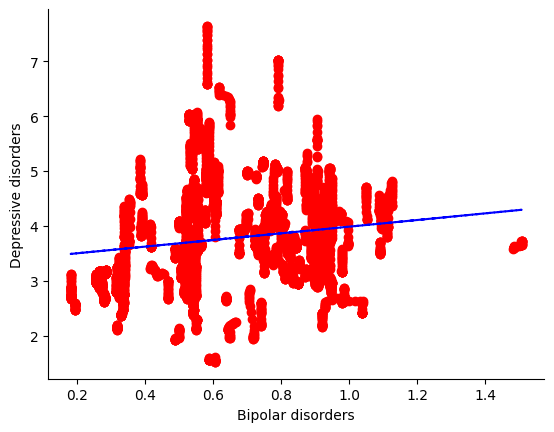

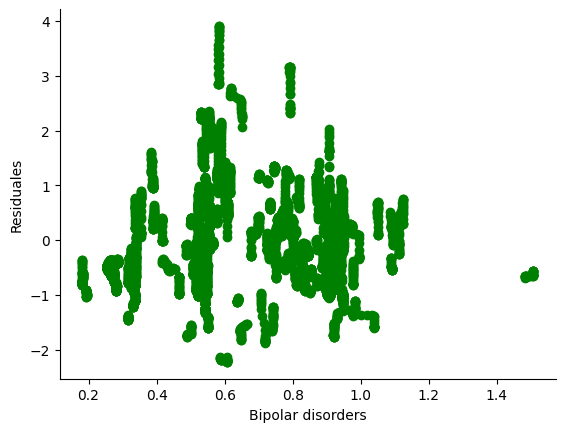

In [34]:
# Hipótesis de causalidad: Redacta una hipótesis sobre la causalidad entre las dos variables, a su vez, establece la variable dependiente y la variable independiente.

  # Hipótesis:
  # El trastorno bipolar aumenta las posibilidades de tener trastornos depresivos, debido a que las personas con trastorno bipolar suelen pasar por episodios de depresión.

X = df['Bipolar_disorders']
Y = df['Depressive_disorders']


# Recta de regresión ajustada: Realiza los cálculos necesarios para encontrar la recta de regresión ajustada. Incluye los procedimientos que te llevaron a la recta de regresión
import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()

b0, b1 = modelo.params

fun = lambda x: b0 + b1 * x

Yc = fun(X)

plt.plot(X, Yc, color = 'blue', linestyle = '--')


# Grafica los puntos y la recta de regresión
import matplotlib.pyplot as plt
plt.scatter(X, Y, color = 'red')
plt.xlabel('Bipolar disorders')
plt.ylabel('Depressive disorders')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Coeficiente de correlación y determinación: Realiza los cálculos necesarios para obtener la r de Pearson y el coeficiente de determinación. Incluye dichos cálculos
from scipy.stats import pearsonr
r, _ = pearsonr(X, Y)
print(f'Coeficiente de correlación: {r:0.4f}\n')

from sklearn.metrics import r2_score
r2 = r2_score(Y, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')


# Interpreta los resultados del coeficiente de correlación y el coeficiente de determinación.
    # Coeficiente de correlación: Hay una relación muy debil entre las variables.
    # Coeficiente de determinación: Significa que Y está sujeto a X con un 2% de variación.


# Calcula el intervalo de confianza del 95% para β_1 y β_0 ¿Qué dice el intervalo de confianza a la posibilidad de que β_1 sea igual a cero?
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')
  # Que se descarta que β_1 sea igual a cero debido a que no está en el intervalo de confianza, lo que significa que hay una relación lineal estadísticamente significativa


# Realiza el gráfico de los residuales: A partir de este gráfico, menciona si los datos cumplen con los supuestos para la regresión: linealidad, normalidad en torno a la recta, homoscedasticidad (hay más, pero con estas nos bastan)
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = 'green')
plt.xlabel('Bipolar disorders')
plt.ylabel('Residuales')
ax= plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# 9.Realice la prueba de Shapiro para los residuales
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')


#10. Realice la prueba de Brausch-Pagan para los residuales
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')


# Linealidad: No hay relación lineal.
# Normalidad en torno a la recta: Los datos no siguen una distribución normal.
# Homoscedasticidad: No hay homoscedasticidad.

